**5.13**
Подробная фильтрация (добавлять ничего не пришлось):

In [162]:
simpleces = [([1], 0), ([2], 0), ([3], 0), ([1,2], 4), ([2,3], 4), ([4], 4), ([1,4], 5), ([3,4], 5),
             ([1,3], 7), ([2,4], 10), ([1,2,3], 16), ([1,2,4], 16), ([1,3,4], 16), ([2,3,4], 20), ([1,2,3,4], 23)]
max_time = 23

In [163]:
import dionysus as dio
import numpy as np

In [164]:

filtration = dio.Filtration()
for simplex, time in simpleces:
    filtration.append(dio.Simplex(simplex, time))
    
pairs = []
free = []
reduced_matrix = dio.homology_persistence(filtration)
full_matrix =  np.zeros((len(simpleces), len(simpleces)))

for i in range(len(reduced_matrix)):
    for j in range(len(reduced_matrix[i])):
        matrix_itself[reduced_matrix[i][j].index][i] = reduced_matrix[i][j].element
    pair = reduced_matrix.pair(i)
    if pair == reduced_matrix.unpaired:
        free.append(i)
    elif i < pair:
        pairs.append((i, pair))

Сама приведенная матрица:

In [165]:
print(matrix_itself)

[[0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Сопряженные пары:

In [166]:
for i in pairs:
    print(simpleces[i[0]][0], simpleces[i[1]][0])

[2] [1, 2]
[3] [2, 3]
[4] [1, 4]
[3, 4] [1, 3, 4]
[1, 3] [1, 2, 3]
[2, 4] [1, 2, 4]
[2, 3, 4] [1, 2, 3, 4]


Одиночные симплексы:

In [167]:
for i in free:
    print(simpleces[i][0])

[1]


Диаграмма устойчивости:

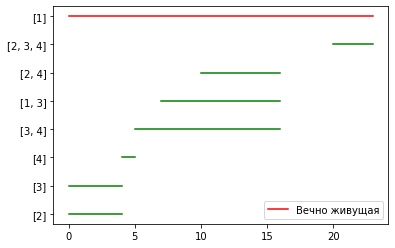

In [172]:
import matplotlib.pyplot as plt

for i in range(len(pairs)):
    pair = pairs[i]
    plt.plot([simpleces[pair[0]][1], simpleces[pair[1]][1]], 
             [str(simpleces[pair[0]][0]), str(simpleces[pair[0]][0])], color="green")
    
for i in free:
    plt.plot([simpleces[i][1], max_time], [str(simpleces[i][0]), str(simpleces[i][0])], color="red", label="Вечно живущая")
    plt.legend()

**5.14**

Сразу добавим недостающие симплексы больших размерностей:

In [210]:
import itertools as itt

simpleces = [([1], 0), ([2], 0), ([3], 0), ([1,2], 2), ([4], 2.5), ([5], 3), ([2,3], 3), ([3,4], 3.7), ([1,4], 4), 
             ([1,5], 4.3), ([4,5], 5), ([3,5], 7.9), ([6], 8), ([1,6], 9), ([3,6], 9), ([2,6], 9.3), ([2,5], 10.2), 
             ([4,6], 12)]
max_time = 12

vertice_num = 6
for i in range(3, vertice_num + 1):
    for comb in list(itt.combinations(range(1, vertice_num + 1), i)):
        subcombs = list(map(list, itt.combinations(comb, i - 1)))
        times = []
        for elem in simpleces:
            if elem[0] in subcombs:
                times.append(elem[1])
        if len(times) == i:
            simpleces.append((list(comb), max(times)))

print(simpleces)

[([1], 0), ([2], 0), ([3], 0), ([1, 2], 2), ([4], 2.5), ([5], 3), ([2, 3], 3), ([3, 4], 3.7), ([1, 4], 4), ([1, 5], 4.3), ([4, 5], 5), ([3, 5], 7.9), ([6], 8), ([1, 6], 9), ([3, 6], 9), ([2, 6], 9.3), ([2, 5], 10.2), ([4, 6], 12), ([1, 2, 5], 10.2), ([1, 2, 6], 9.3), ([1, 4, 5], 5), ([1, 4, 6], 12), ([2, 3, 5], 10.2), ([2, 3, 6], 9.3), ([3, 4, 5], 7.9), ([3, 4, 6], 12)]


In [211]:
filtration = dio.Filtration()
for simplex, time in simpleces:
    filtration.append(dio.Simplex(simplex, time))
filtration.sort()

pairs = []
free = []
reduced_matrix = dio.homology_persistence(filtration)

for i in range(len(reduced_matrix)):
    pair = reduced_matrix.pair(i)
    if pair == reduced_matrix.unpaired:
        free.append(i)
    elif i < pair:
        pairs.append((i, pair))


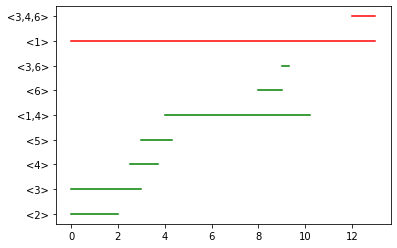

In [212]:
import matplotlib.pyplot as plt

for i in range(len(pairs)):
    pair = pairs[i]
    if (filtration[pair[0]].data - filtration[pair[1]].data) < 0:
        plt.plot([filtration[pair[0]].data, filtration[pair[1]].data],
                 [str(filtration[pair[0]]).split()[0], str(filtration[pair[0]]).split()[0]], color="green")
    
for i in free:
    plt.plot([filtration[i].data, max_time + 1], [str(filtration[i]).split()[0], str(filtration[i]).split()[0]], color="red")
                                                 